### TTim example of pumping test analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ttim

Load data of two observation wells

In [2]:
drawdown = np.loadtxt("data/oudekorendijk_h30.dat")
to1 = drawdown[:, 0] / 60 / 24
ho1 = -drawdown[:, 1]
ro1 = 30

drawdown = np.loadtxt("data/oudekorendijk_h90.dat")
to2 = drawdown[:, 0] / 60 / 24
ho2 = -drawdown[:, 1]
ro2 = 90

Pumping discharge

In [3]:
Qo = 788

Create model

In [4]:
ml = ttim.ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = ttim.Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


Create calibration object, add parameters and first series. Fit the model. The chi-square value is the mean of the squared residuals at the optimum.

In [5]:
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", layers=0, initial=10)
cal.set_parameter(name="Saq0", layers=0, initial=1e-4)
cal.series(name="obs1", x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit(report=True)
display(cal.parameters)
print("rmse:", cal.rmse())
print("mse:", cal.rmse() ** 2 * len(ho1))
h1a = ml.head(ro1, 0, to1, 0)  # simulated head
h2a = ml.head(ro2, 0, to2, 0)  # simulated head

..................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 47
    # data points      = 34
    # variables        = 2
    chi-square         = 0.03407771
    reduced chi-square = 0.00106493
    Akaike info crit   = -230.786060
    Bayesian info crit = -227.733339
[[Variables]]
    kaq0:  68.6492596 +/- 1.41621937 (2.06%) (init = 10)
    Saq0:  1.6063e-05 +/- 1.5636e-06 (9.73%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.8899


,layers,optimal,std,perc_std,pmin,pmax,initial,inhoms,parray
kaq0,0,68.649260,1.416219,2.062978,-inf,inf,10.0000,None,[[68.6492596264793]]
Saq0,0,0.000016,0.000002,9.734531,-inf,inf,0.0001,None,[[1.6062884454270056e-05]]


rmse: 0.031658893506450375
mse: 0.03407770829379403


In [6]:
# second observation well
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", layers=0, initial=50)
cal.set_parameter(name="Saq0", layers=0, initial=1.5e-5)
cal.series(name="obs1", x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)
h1b = ml.head(ro1, 0, to1, 0)  # simulated head
h2b = ml.head(ro2, 0, to2, 0)  # simulated head

.....

....................................
Fit succeeded.


,layers,optimal,std,perc_std,pmin,pmax,initial,inhoms,parray
kaq0,0,71.566003,1.532174,2.140924,-inf,inf,50.000000,None,[[71.56600286604609]]
Saq0,0,0.000029,0.000002,6.470356,-inf,inf,0.000015,None,[[2.9138571919092998e-05]]


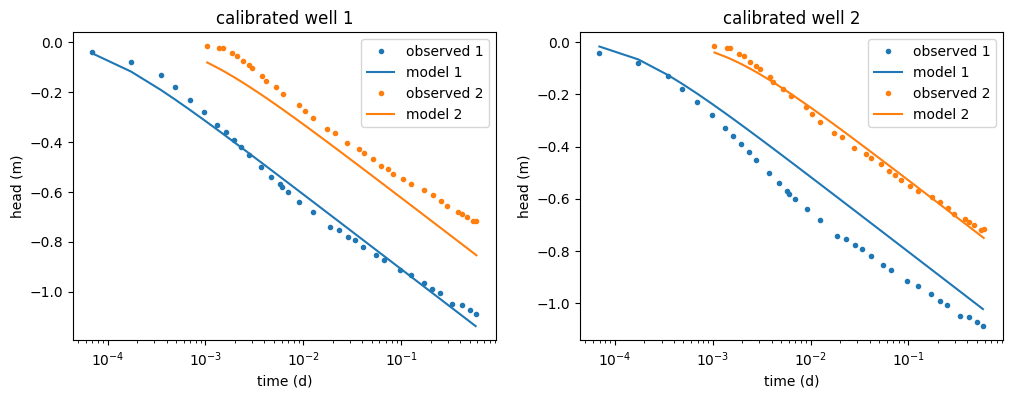

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.semilogx(to1, ho1, "C0.", label="observed 1")
plt.semilogx(to1, h1a[0], "C0", label="model 1")
plt.semilogx(to2, ho2, "C1.", label="observed 2")
plt.semilogx(to2, h2a[0], "C1", label="model 2")
plt.title("calibrated well 1")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()
plt.subplot(122)
plt.semilogx(to1, ho1, "C0.", label="observed 1")
plt.semilogx(to1, h1b[0], "C0", label="model 1")
plt.semilogx(to2, ho2, "C1.", label="observed 2")
plt.semilogx(to2, h2b[0], "C1", label="model 2")
plt.title("calibrated well 2")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()

### Add wellbore storage

In [8]:
ml = ttim.ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = ttim.Well(ml, xw=0, yw=0, rw=0.1, rc=0.2, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


In [9]:
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", layers=0, initial=10)
cal.set_parameter(name="Saq0", layers=0, initial=1e-5)
cal.set_parameter_by_reference(
    name="rc", parameter=w.rc[:], initial=0.2, pmin=0.01, pmax=1
)
cal.series(name="obs1", x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit(report=False)
display(cal.parameters)
h1a = ml.head(ro1, 0, to1, 0)  # simulated head
h2a = ml.head(ro2, 0, to2, 0)  # simulated head

.........................................................................
Fit succeeded.


,layers,optimal,std,perc_std,pmin,pmax,initial,inhoms,parray
kaq0,0.0,80.799178,1.712592e+00,2.119566,-inf,inf,10.00000,None,[[80.79917764798174]]
Saq0,0.0,0.000006,7.923522e-07,14.330856,-inf,inf,0.00001,None,[[5.528994221589252e-06]]
rc,NaN,0.288081,1.690193e-02,5.867067,0.01,1.0,0.20000,NaN,[[0.2880813710301167]]


In [10]:
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", layers=0, initial=10)
cal.set_parameter(name="Saq0", layers=0, initial=1e-5)
cal.set_parameter_by_reference(
    name="rc", parameter=w.rc[:], initial=0.2, pmin=0.01, pmax=1
)
cal.series(name="obs2", x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)
h1b = ml.head(ro1, 0, to1, 0)  # simulated head
h2b = ml.head(ro2, 0, to2, 0)  # simulated head

............................................
Fit succeeded.


,layers,optimal,std,perc_std,pmin,pmax,initial,inhoms,parray
kaq0,0.0,88.287085,1.252834e+00,1.419046,-inf,inf,10.00000,None,[[88.28708488294048]]
Saq0,0.0,0.000011,7.780539e-07,6.838748,-inf,inf,0.00001,None,[[1.1377140240910996e-05]]
rc,NaN,0.643720,2.443681e-02,3.796183,0.01,1.0,0.20000,NaN,[[0.6437204331104573]]


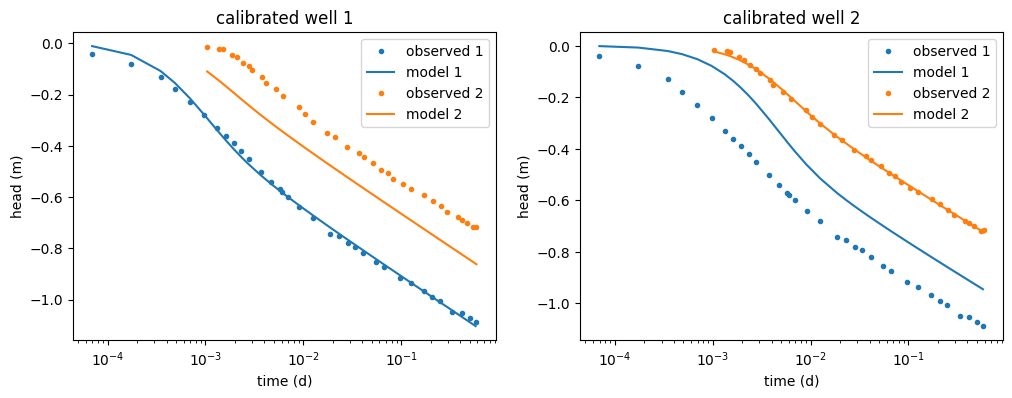

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.semilogx(to1, ho1, "C0.", label="observed 1")
plt.semilogx(to1, h1a[0], "C0", label="model 1")
plt.semilogx(to2, ho2, "C1.", label="observed 2")
plt.semilogx(to2, h2a[0], "C1", label="model 2")
plt.title("calibrated well 1")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()
plt.subplot(122)
plt.semilogx(to1, ho1, "C0.", label="observed 1")
plt.semilogx(to1, h1b[0], "C0", label="model 1")
plt.semilogx(to2, ho2, "C1.", label="observed 2")
plt.semilogx(to2, h2b[0], "C1", label="model 2")
plt.title("calibrated well 2")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()

### Two observation wells simultaneously

In [12]:
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", layers=0, initial=10)
cal.set_parameter(name="Saq0", layers=0, initial=1e-5)
cal.set_parameter_by_reference(
    name="rc", parameter=w.rc[:], initial=0.2, pmin=0.01, pmax=1
)
cal.series(name="obs1", x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.series(name="obs2", x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)

................................................................
Fit succeeded.


,layers,optimal,std,perc_std,pmin,pmax,initial,inhoms,parray
kaq0,0.0,66.091137,1.689688,2.556604,-inf,inf,10.00000,None,[[66.09113709265297]]
Saq0,0.0,0.000025,0.000003,9.983387,-inf,inf,0.00001,None,[[2.5399156436042426e-05]]
rc,NaN,0.010228,0.077095,753.755688,0.01,1.0,0.20000,NaN,[[0.010228060206753034]]


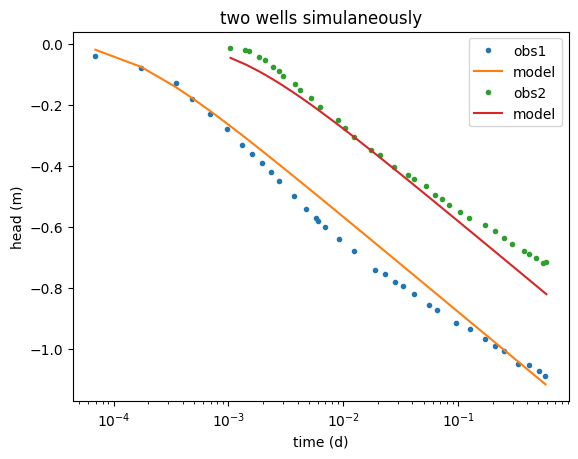

In [13]:
h1 = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, ".", label="obs1")
plt.semilogx(to1, h1[0], label="model")
h2 = ml.head(ro2, 0, to2, 0)
plt.semilogx(to2, ho2, ".", label="obs2")
plt.semilogx(to2, h2[0], label="model")
plt.title("two wells simulaneously")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()